In [1]:
import pyfolio as pf
import yfinance as yf

/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
data = yf.Ticker('BN').history('max')

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1983-12-30 00:00:00-05:00,0.158135,0.158135,0.157497,0.157497,130489,0.0,0.0
1984-01-03 00:00:00-05:00,0.158453,0.158772,0.158134,0.158134,265996,0.0,0.0
1984-01-04 00:00:00-05:00,0.158135,0.158772,0.158135,0.158772,100376,0.0,0.0
1984-01-05 00:00:00-05:00,0.160047,0.160685,0.159410,0.159410,486823,0.0,0.0
1984-01-06 00:00:00-05:00,0.159410,0.161323,0.158772,0.160685,391466,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-05 00:00:00-05:00,46.869999,49.029999,46.820000,48.810001,9061300,0.0,0.0
2026-01-06 00:00:00-05:00,48.990002,49.570000,48.270000,49.169998,5984400,0.0,0.0
2026-01-07 00:00:00-05:00,49.000000,49.310001,47.119999,47.130001,5852700,0.0,0.0


In [4]:
returns = data.Close.pct_change()

In [5]:
returns

Date
1983-12-30 00:00:00-05:00         NaN
1984-01-03 00:00:00-05:00    0.004047
1984-01-04 00:00:00-05:00    0.004033
1984-01-05 00:00:00-05:00    0.004016
1984-01-06 00:00:00-05:00    0.008000
                               ...   
2026-01-05 00:00:00-05:00    0.046751
2026-01-06 00:00:00-05:00    0.007375
2026-01-07 00:00:00-05:00   -0.041489
2026-01-08 00:00:00-05:00    0.002334
2026-01-09 00:00:00-05:00    0.008891
Name: Close, Length: 10590, dtype: float64

In [7]:
bench = yf.Ticker('SPY').history('max')

In [8]:
bench

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.258635,24.258635,24.137946,24.241394,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,24.258651,24.413824,24.258651,24.413824,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,24.396580,24.482787,24.344856,24.465546,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,24.500027,24.741406,24.482785,24.724165,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,24.810386,24.879351,24.534523,24.827627,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2026-01-05 00:00:00-05:00,686.539978,689.429993,686.380005,687.719971,71927200,0.0,0.0,0.0
2026-01-06 00:00:00-05:00,687.929993,692.320007,687.780029,691.809998,69273800,0.0,0.0,0.0
2026-01-07 00:00:00-05:00,692.190002,693.960022,689.320007,689.580017,75588300,0.0,0.0,0.0


In [9]:
bench_returns = bench.Close.pct_change()

In [15]:
returns = returns.dropna()
bench_returns = bench_returns.dropna()

In [16]:
returns, bench_returns = bench_returns.align(returns, join='inner')

/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.06%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.306%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will 

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,72.49,2007-05-22,2009-03-09,2012-08-08,1362
1,51.42,2020-02-20,2020-03-23,2021-03-17,280
2,41.69,2021-10-28,2023-03-17,2024-07-31,720
3,41.48,1998-04-23,1999-04-09,2001-02-13,734
4,28.62,2015-04-15,2016-02-11,2017-02-15,481


/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


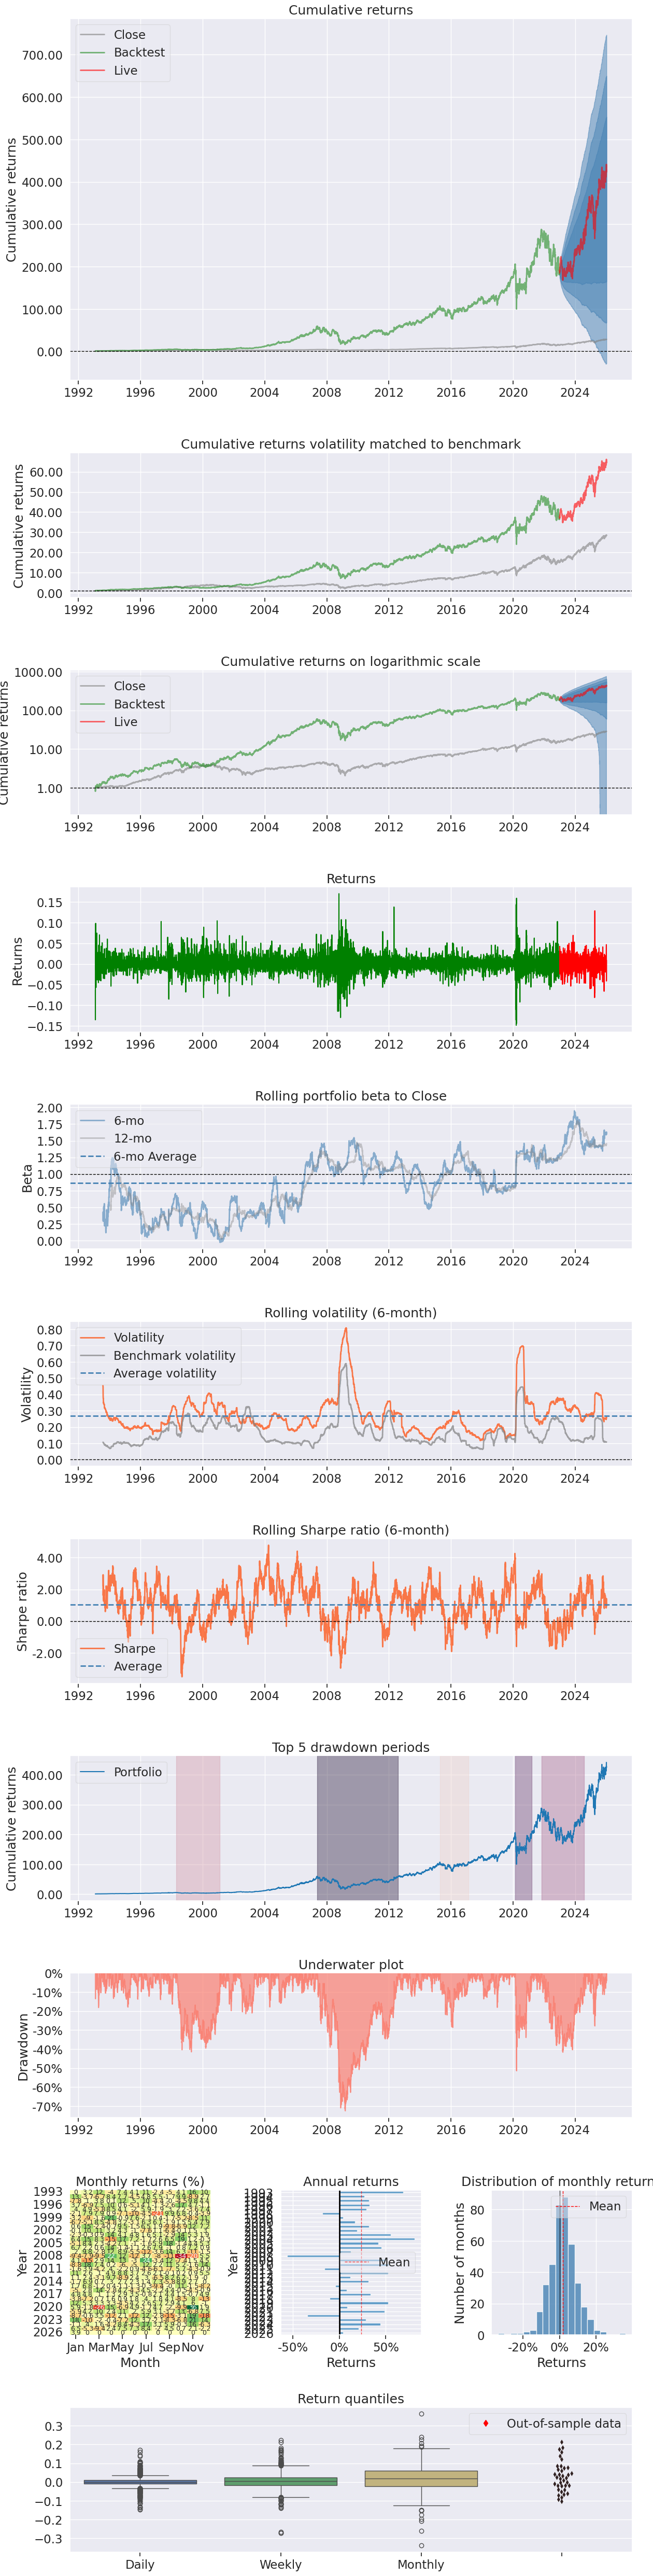

In [20]:
pf.create_returns_tear_sheet(returns, live_start_date='2023-01-01', benchmark_rets=bench_returns)